<a href="https://colab.research.google.com/github/Janina712/MLTSA_FinalProject/blob/main/Preprocessing_tryout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mne matplotlib

     |████████████████████████████████| 7.5 MB 8.3 MB/s 


In [ ]:
import numpy as np
import mne 
import pandas as pd
import os
import pylab as pl

In [ ]:
!wget --user "nedc" --password "nedc_resources" "https://isip.piconepress.com/projects/tuh_eeg/downloads/tuh_eeg_seizure/v1.4.0/edf/train/01_tcp_ar/000/00000077/s003_2010_01_21/00000077_s003_t000.edf"

--2022-04-28 18:12:06--  https://isip.piconepress.com/projects/tuh_eeg/downloads/tuh_eeg_seizure/v1.4.0/edf/train/01_tcp_ar/000/00000077/s003_2010_01_21/00000077_s003_t000.edf
Resolving isip.piconepress.com (isip.piconepress.com)... 129.32.84.206
Connecting to isip.piconepress.com (isip.piconepress.com)|129.32.84.206|:443... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="restricted stuff"
Reusing existing connection to isip.piconepress.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 19899202 (19M)
Saving to: ‘00000077_s003_t000.edf’

00000077_s003_t000. 100%[===================>]  18.98M  7.99MB/s    in 2.4s    

2022-04-28 18:12:10 (7.99 MB/s) - ‘00000077_s003_t000.edf’ saved [19899202/19899202]



In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/MLTSA22/Final_Project

/content/drive/MyDrive/MLTSA22/Final_Project


In [ ]:
!ls /content/drive/MyDrive/MLTSA22/Final_Project

00000258_s002_t000.edf	all_tuh_eeg_seizure_links.txt


In [ ]:
file = '00000258_s002_t000.edf'
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

Extracting EDF parameters from /content/drive/MyDrive/MLTSA22/Final_Project/00000258_s002_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [ ]:
data

<RawEDF | 00000258_s002_t000.edf, 32 x 8000 (20.0 s), ~36 kB, data not loaded>

In [ ]:
data.describe()

<RawEDF | 00000258_s002_t000.edf, 32 x 8000 (20.0 s), ~36 kB, data not loaded>
ch  name           type  unit        min         Q1     median         Q3        max
 0  EEG FP1-REF    EEG   µV       -49.48      -1.79      10.81      20.70     164.67
 1  EEG FP2-REF    EEG   µV       -57.58      -1.79       8.11      22.73     163.77
 2  EEG F3-REF     EEG   µV       -31.48       3.61      11.71      18.91      75.59
 3  EEG F4-REF     EEG   µV       -44.08      -0.89      11.71      24.30      82.79
 4  EEG C3-REF     EEG   µV       -14.39       7.21      12.61      18.01      46.80
 5  EEG C4-REF     EEG   µV       -40.48       3.61      12.61      22.50      67.49
 6  EEG P3-REF     EEG   µV       -40.48       7.21      13.51      18.91      39.60
 7  EEG P4-REF     EEG   µV       -62.07       0.01      12.61      26.33      77.39
 8  EEG O1-REF     EEG   µV       -45.88       5.41      14.41      21.60      52.20
 9  EEG O2-REF     EEG   µV       -53.08       1.81      12.61      23.

In [ ]:
raw_data.shape

(32, 8000)

In [ ]:
raw_data

array([[ 3.06025394e-05,  2.25045143e-05,  2.16047337e-05, ...,
        -1.07873669e-05, -4.48890286e-06, -4.48890286e-06],
       [ 7.73911292e-05,  6.83933235e-05,  6.56939817e-05, ...,
        -1.16871474e-05, -8.98780572e-06, -8.08802515e-06],
       [ 1.62060503e-05,  7.20824458e-06,  1.26069280e-05, ...,
        -8.89780572e-07,  4.50890286e-06,  5.40868343e-06],
       ...,
       [ 1.00000000e-08, -7.18824458e-06, -1.16871474e-05, ...,
         4.05001257e-05,  4.76983703e-05,  4.31994675e-05],
       [ 1.00000000e-08, -4.48890286e-06, -1.78956114e-06, ...,
         3.15023200e-05,  3.69010034e-05,  3.69010034e-05],
       [-5.38868343e-06, -3.58912229e-06, -1.78956114e-06, ...,
         1.00000000e-08, -8.89780572e-07, -2.68934172e-06]])

In [ ]:
info['sfreq'] #the way to extract sampling frequency
info['chs']

[{'cal': 1.0,
  'ch_name': 'EEG FP1-REF',
  'coil_type': 1 (FIFFV_COIL_EEG),
  'coord_frame': 4 (FIFFV_COORD_HEAD),
  'kind': 2 (FIFFV_EEG_CH),
  'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
  'logno': 1,
  'range': 1.0,
  'scanno': 1,
  'unit': 107 (FIFF_UNIT_V),
  'unit_mul': 0 (FIFF_UNITM_NONE)},
 {'cal': 1.0,
  'ch_name': 'EEG FP2-REF',
  'coil_type': 1 (FIFFV_COIL_EEG),
  'coord_frame': 4 (FIFFV_COORD_HEAD),
  'kind': 2 (FIFFV_EEG_CH),
  'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
  'logno': 2,
  'range': 1.0,
  'scanno': 2,
  'unit': 107 (FIFF_UNIT_V),
  'unit_mul': 0 (FIFF_UNITM_NONE)},
 {'cal': 1.0,
  'ch_name': 'EEG F3-REF',
  'coil_type': 1 (FIFFV_COIL_EEG),
  'coord_frame': 4 (FIFFV_COORD_HEAD),
  'kind': 2 (FIFFV_EEG_CH),
  'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
  'logno': 3,
  'range': 1.0,
  'scanno': 3,
  'unit': 107 (FIFF_UNIT_V),
  'unit_mul': 0 (FIFF_UNITM_NONE)},
 {'ca

In [ ]:
info['bads'] #whether there are labeled bad channels

[]

In [ ]:
len(channels)

32

In [ ]:
channels

['EEG FP1-REF',
 'EEG FP2-REF',
 'EEG F3-REF',
 'EEG F4-REF',
 'EEG C3-REF',
 'EEG C4-REF',
 'EEG P3-REF',
 'EEG P4-REF',
 'EEG O1-REF',
 'EEG O2-REF',
 'EEG F7-REF',
 'EEG F8-REF',
 'EEG T3-REF',
 'EEG T4-REF',
 'EEG T5-REF',
 'EEG T6-REF',
 'EEG FZ-REF',
 'EEG CZ-REF',
 'EEG PZ-REF',
 'EEG EKG-REF',
 'EEG A1-REF',
 'EEG A2-REF',
 'EEG T1-REF',
 'EEG T2-REF',
 'EEG SP1-REF',
 'EEG SP2-REF',
 'EEG LUC-REF',
 'EEG RLC-REF',
 'EEG RESP1-REF',
 'EEG RESP2-REF',
 'EEG 31-REF',
 'EEG 32-REF']

Opening raw-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


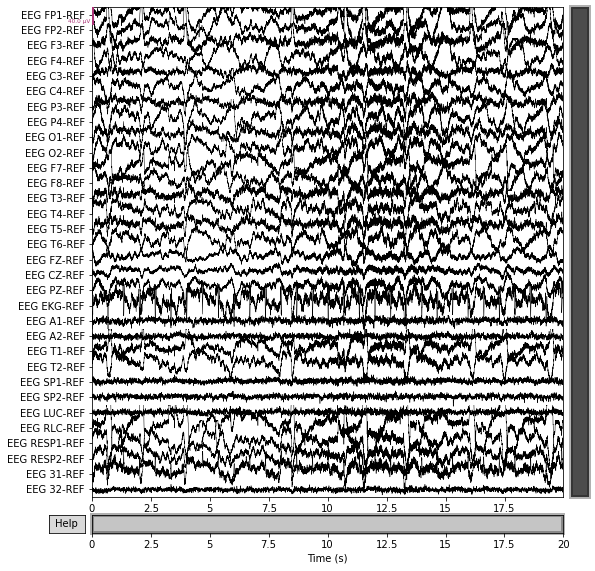

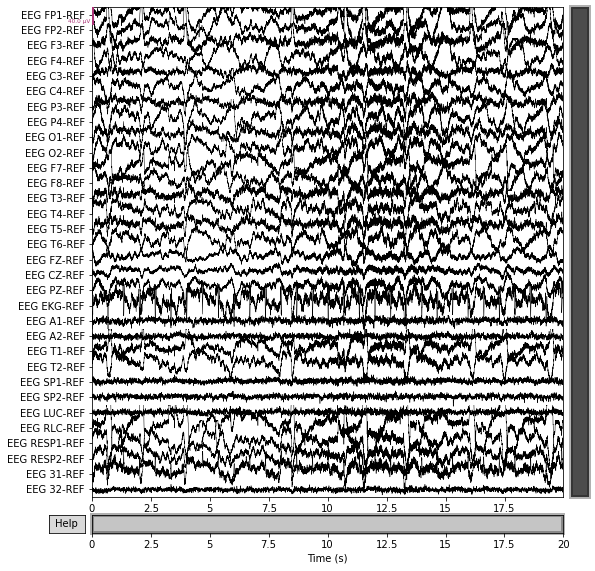

In [ ]:
data.plot(duration=60, proj=False, n_channels=len(channels),
         remove_dc=False)

In [ ]:
filter_params = mne.filter.create_filter(data.get_data(), data.info['sfreq'],
                                         l_freq=0.2, h_freq=None)

Setting up high-pass filter at 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Filter length: 6601 samples (16.503 sec)



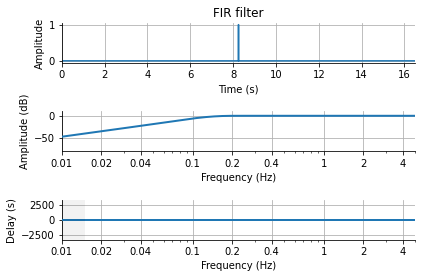

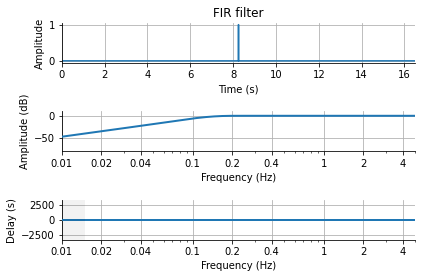

In [ ]:
mne.viz.plot_filter(filter_params, data.info['sfreq'], flim=(0.01, 5))

Effective window size : 5.120 (s)


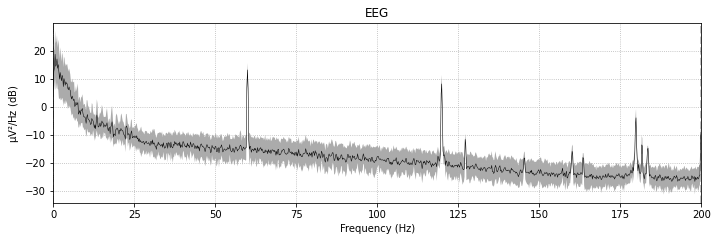

In [ ]:
fig = data.plot_psd(fmax=200, average=True) #power outlet at 60 Hz

Reading 0 ... 7999  =      0.000 ...    19.997 secs...
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 2641 samples (6.603 sec)

Effective window size : 5.120 (s)


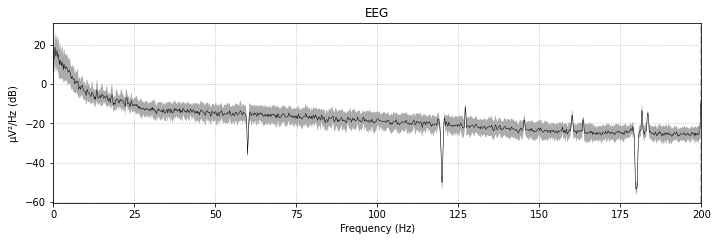

In [ ]:
eeg_picks = mne.pick_types(data.info, eeg=True)
freqs = (60, 120, 180)
raw_notch = data.copy().load_data()
raw_notch = raw_notch.notch_filter(freqs=freqs, picks=eeg_picks)
fig = raw_notch.plot_psd(fmax=200, average=True)    # put data.info['sfreq'] instead of 200? The sampling freq is different across files and it can't be more than half. 

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Filter length: 6601 samples (16.503 sec)

Effective window size : 5.120 (s)


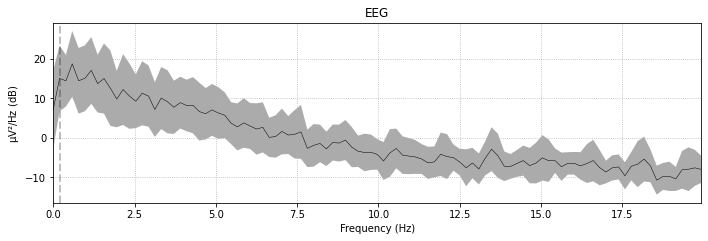

In [ ]:
#high-pass filter
raw_notch = raw_notch.filter(l_freq=0.2, h_freq=None)
fig = raw_notch.plot_psd(fmax=20, average=True)

Effective window size : 10.240 (s)


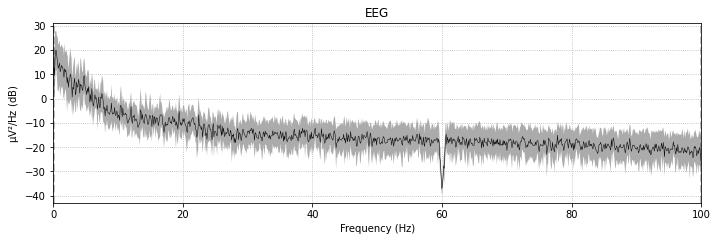

In [ ]:
#downsampling
raw_downsampled = raw_notch.resample(sfreq=200)
fig = raw_downsampled.plot_psd(average=True)

Opening raw-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


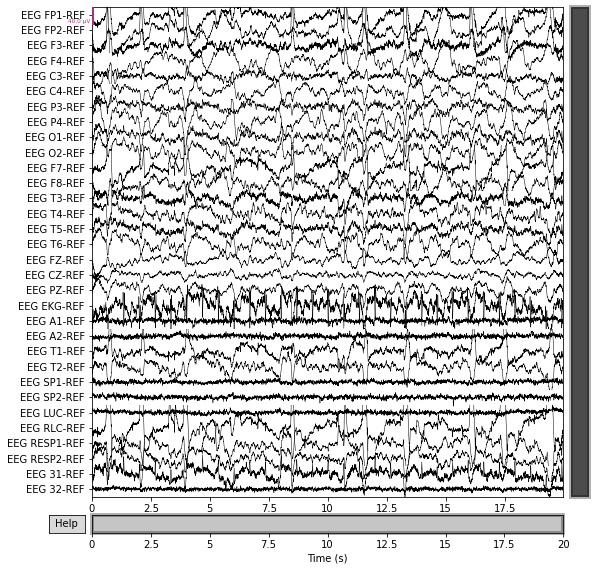

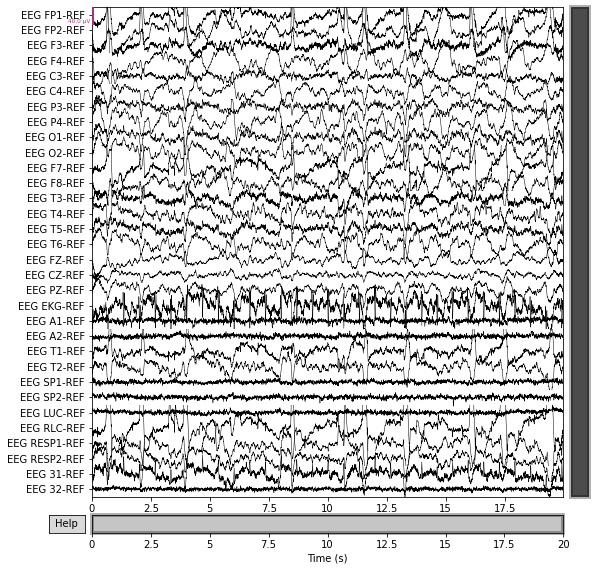

In [ ]:
raw_downsampled.plot(duration=60, proj=False, n_channels=len(channels),
         remove_dc=False)

In [ ]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw_notch)

Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 14.3s.


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,


Method,fastica
Fit,800 iterations on raw data (8000 samples)
ICA components,20
Explained variance,99.5 %
Available PCA components,32
Channel types,eeg
ICA components marked for exclusion,—


In [ ]:
channels

['EEG FP1-REF',
 'EEG FP2-REF',
 'EEG F3-REF',
 'EEG F4-REF',
 'EEG C3-REF',
 'EEG C4-REF',
 'EEG P3-REF',
 'EEG P4-REF',
 'EEG O1-REF',
 'EEG O2-REF',
 'EEG F7-REF',
 'EEG F8-REF',
 'EEG T3-REF',
 'EEG T4-REF',
 'EEG T5-REF',
 'EEG T6-REF',
 'EEG FZ-REF',
 'EEG CZ-REF',
 'EEG PZ-REF',
 'EEG EKG-REF',
 'EEG A1-REF',
 'EEG A2-REF',
 'EEG T1-REF',
 'EEG T2-REF',
 'EEG SP1-REF',
 'EEG SP2-REF',
 'EEG LUC-REF',
 'EEG RLC-REF',
 'EEG RESP1-REF',
 'EEG RESP2-REF',
 'EEG 31-REF',
 'EEG 32-REF']

    Using multitaper spectrum estimation with 7 DPSS windows


RuntimeError: ignored

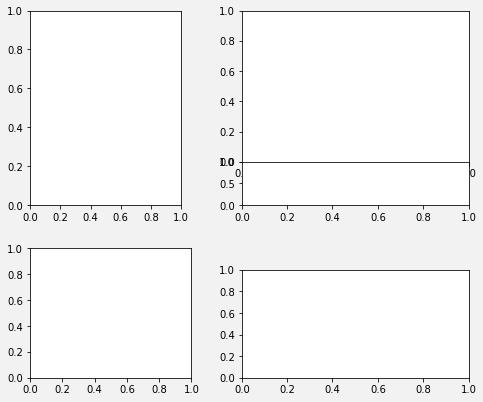

In [ ]:
#ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw_notch)

In [ ]:
def preprocessing(data):
  